# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from itertools import product

# Export Data

In [2]:
df = pd.read_csv("adsb_fe_us_2.csv", index_col=False)
df.head(10)

,time,velocity,heading,geoaltitude,dist_from_airport_nm,target_alt,target_heading,alt_dev,heading_diff
0,1513184610,82.753558,231.562699,906.78,8.550130,829.869163,230.2,76.910837,1.362699
1,1513184611,82.434735,231.842773,906.78,8.502497,825.246007,230.2,81.533993,1.642773
2,1513184612,82.030834,231.620776,899.16,8.447833,819.940323,230.2,79.219677,1.420776
3,1513184613,82.030834,231.620776,906.78,8.403408,815.628471,230.2,91.151529,1.420776
4,1513184614,81.628177,231.396585,899.16,8.358983,811.316593,230.2,87.843407,1.196585
5,1513184615,81.308196,231.679886,891.54,8.313343,806.886839,230.2,84.653161,1.479886
6,1513184616,80.905213,231.453987,883.92,8.271864,802.860928,230.2,81.059072,1.253987
7,1513184617,80.585645,231.740056,883.92,8.233687,799.155510,230.2,84.764490,1.540056
8,1513184618,80.585645,231.740056,883.92,8.188855,794.804148,230.2,89.115852,1.540056
9,1513184619,79.863185,231.801315,876.30,8.161082,792.108511,230.2,84.191489,1.601315


# Select relevant data for unsupervised learning

In [3]:
df2 = df[['time','heading','dist_from_airport_nm','alt_dev','heading_diff']]
df2.head(5)
df2=df2[['dist_from_airport_nm','alt_dev','heading_diff']]
df2.head(5)

,dist_from_airport_nm,alt_dev,heading_diff
0,8.550130,76.910837,1.362699
1,8.502497,81.533993,1.642773
2,8.447833,79.219677,1.420776
3,8.403408,91.151529,1.420776
4,8.358983,87.843407,1.196585


In [4]:
print(df2.shape)
print(df2.info())

(210, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dist_from_airport_nm  210 non-null    float64
 1   alt_dev               210 non-null    float64
 2   heading_diff          210 non-null    float64
dtypes: float64(3)
memory usage: 5.0 KB
None


In [5]:
df2.describe()

,dist_from_airport_nm,alt_dev,heading_diff
count,210.000000,210.000000,210.000000
mean,4.606328,79.926932,1.478575
std,2.140178,8.193195,0.375685
min,0.769610,59.502702,0.387244
25%,2.833988,75.256935,1.299346
50%,4.543332,78.786502,1.502033
75%,6.352027,83.885888,1.669992
max,8.550130,103.598784,2.496052


# Features Engineering before Unsupervised learning

In [7]:
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler())])

standard_transformer = Pipeline(steps=[
    ('standard', StandardScaler())])

scale_features = ['dist_from_airport_nm', 'alt_dev','heading_diff']
#scale_features_2 = ['heading']

preprocessor = ColumnTransformer(
    transformers=[
        ('mm', minmax_transformer, scale_features)],
    remainder='passthrough')

df_transform = pd.DataFrame(preprocessor.fit_transform(df2),columns=df2.columns)
df_transform

,dist_from_airport_nm,alt_dev,heading_diff
0,1.000000,0.394777,0.462562
1,0.993878,0.499620,0.595374
2,0.986852,0.447137,0.490103
3,0.981142,0.717724,0.490103
4,0.975433,0.642703,0.383791
...,...,...,...
205,0.032802,0.369391,0.691635
206,0.018980,0.260486,0.595374
207,0.012710,0.367871,0.595374
208,0.006409,0.475775,0.595374


In [8]:
df_transform.describe()

,dist_from_airport_nm,alt_dev,heading_diff
count,210.000000,210.000000,210.000000
mean,0.493119,0.463176,0.517511
std,0.275069,0.185803,0.178151
min,0.000000,0.000000,0.000000
25%,0.265327,0.357271,0.432520
50%,0.485022,0.437313,0.528635
75%,0.717486,0.552956,0.608281
max,1.000000,1.000000,1.000000


# KMeans Model Part I - Elbow method to determine optimal number of clusters

calculate and plot SSE to understand number of optimal clusters

In [5]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(df_transform)
    sse.append(kmeans.inertia_)

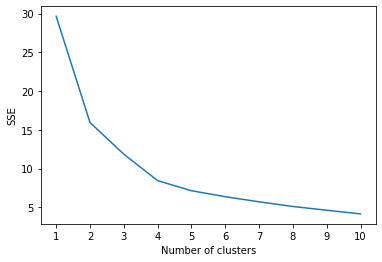

In [6]:
plt.plot((range(1,11)),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Actual model training and testing

In [7]:
model = KMeans(n_clusters=4)
model.fit(df_transform)

KMeans(n_clusters=4)

In [8]:
identified_clusters = model.predict(df_transform)
print(identified_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 2 3 3 3 1 3
 1 1 3 3 3 3 2 2 2 2 3 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1]


<Figure size 432x288 with 0 Axes>

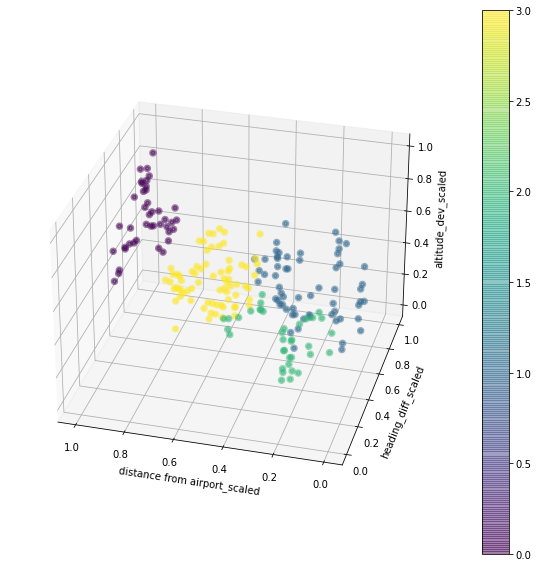

In [9]:
identified_clusters = identified_clusters.astype(float)
identified_clusters
df_clusters = df_transform.copy()
df_clusters['clusters'] = identified_clusters
df_clusters

fig = plt.figure()
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
p_k_scatter = ax.scatter(df_clusters['dist_from_airport_nm'], df_clusters['heading_diff'], df_clusters['alt_dev'],
                         c=df_clusters['clusters'], cmap='viridis', linewidth=3, alpha = 0.5)
plt.gca().invert_xaxis()
fig.colorbar(p_k_scatter)
ax.set_xlabel('distance from airport_scaled')
ax.set_ylabel('heading_diff_scaled')
ax.set_zlabel('altitude_dev_scaled')
ax.view_init(30,285)
plt.show()

In [10]:
model.cluster_centers_

array([[0.8888565 , 0.73029099, 0.55869921],
       [0.24127584, 0.36288554, 0.65616027],
       [0.24738311, 0.37625207, 0.23976211],
       [0.60400227, 0.43949801, 0.51546473]])

In [11]:
silhouette_score(df_transform, model.labels_)

0.35721901631599134

# DBScan Model Part 1 - KNNeighbors method to find optimal epilson vlaue

Find optimal value of epsilon

In [12]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_transform)
distances, indices = nbrs.kneighbors(df_transform)

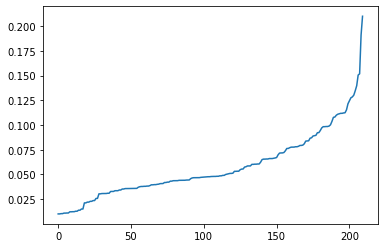

In [13]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Model training and testing

In [14]:
m_dbs = DBSCAN(eps=0.1, min_samples=4)
m_dbs.fit(df_transform)

DBSCAN(eps=0.1, min_samples=4)

In [15]:
clusters_dbs = m_dbs.labels_
clusters_dbs

array([-1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  1,  0,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1, -1,
       -1, -1,  2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  3,  3, -1,  3,  3,
        3,  4,  4, -1,  4,  4,  4,  4,  4,  4,  4, -1,  2,  2,  4,  4,  4,
        4, -1,  5, -1,  5, -1,  4, -1,  4, -1,  5,  5,  5,  5, -1, -1,  5,
        5, -1, -1,  5, -1,  7, -1,  6,  6,  6, -1,  6,  6, -1,  7, -1, -1,
       -1, -1, -1, -1, -1,  7,  7,  7,  7,  7, -1,  7, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

<Figure size 432x288 with 0 Axes>

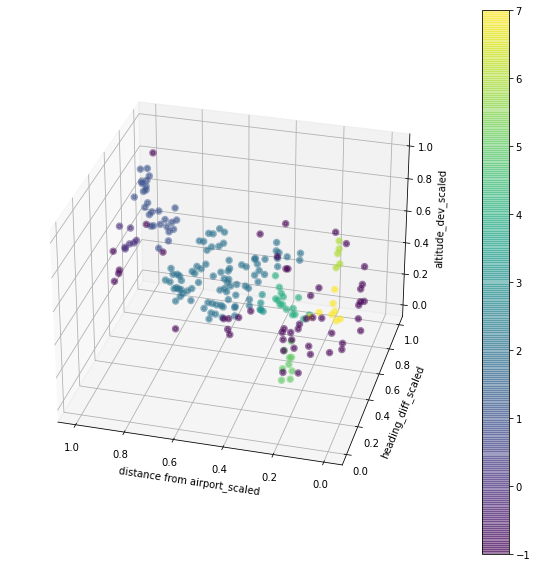

In [16]:
identified_clusters_dbs = clusters_dbs.astype(float)
df_clusters_dbs = df_transform.copy()
df_clusters_dbs['clusters'] = identified_clusters_dbs

fig = plt.figure()
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
p_scatter = ax.scatter3D(df_clusters_dbs['dist_from_airport_nm'], df_clusters_dbs['heading_diff'], 
            df_clusters_dbs['alt_dev'], 
            c=df_clusters_dbs['clusters'], 
            cmap='viridis', linewidth=3, alpha=0.5)
fig.colorbar(p_scatter)
ax.set_xlabel('distance from airport_scaled')
ax.set_ylabel('heading_diff_scaled')
ax.set_zlabel('altitude_dev_scaled')
ax.view_init(30,285)
plt.gca().invert_xaxis()
plt.show()

In [17]:
m_dbs.core_sample_indices_

array([  1,   5,   7,   8,   9,  10,  11,  13,  14,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  30,  31,  33,  34,  35,
        36,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  71,  73,  74,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98, 100, 101, 102, 103, 104, 106, 107,
       108, 109, 110, 112, 114, 115, 116, 123, 124, 125, 129, 130, 131,
       132, 134, 136, 138, 140, 141, 142, 143, 144, 145, 146, 150, 151,
       152, 153, 159, 163, 164, 169, 173, 178, 181, 182, 184, 192, 193,
       195, 196, 198])

In [18]:
n_noise_=list(clusters_dbs).count(-1)
n_noise_

51

In [19]:
silhouette_score(df_transform, m_dbs.labels_)

0.0504788771676403

# DBScan Model Part II  - iteration through epilson, minimum point values and silhouette scores to find best combination of epilson and minimum point values

Instead of using the elbow method and the minimum value heuristic, use an iterative approach to finetune DBSCAN model.

In [20]:
eps_values=np.arange(0.05, 0.2, 0.025)
min_samples = np.arange(2,6)
dbs_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []
epsvalues = []
min_samp = []
noise_pts = []

for i in dbs_params:
    dbs_clust = DBSCAN(eps=i[0], min_samples=i[1]).fit(df_transform)
    epsvalues.append(i[0])
    min_samp.append(i[1])
    no_of_clusters.append(len(np.unique(dbs_clust.labels_)))
    sil_score.append(silhouette_score(df_transform, dbs_clust.labels_))
    noise_pts.append(list(dbs_clust.labels_).count(-1))
    
eps_min = list(zip(no_of_clusters, sil_score, epsvalues, min_samp, noise_pts))

eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'silhouette_score', 
                                            'epilson_values', 'min_pts', 'noise_pts'])

eps_min_df

,no_of_clusters,silhouette_score,epilson_values,min_pts,noise_pts
0,35,-0.038272,0.050,2,94
1,18,-0.170667,0.050,3,128
2,12,-0.301439,0.050,4,156
3,4,-0.386219,0.050,5,191
4,24,0.018664,0.075,2,53
5,15,-0.038942,0.075,3,71
6,9,-0.092795,0.075,4,93
7,9,-0.141703,0.075,5,113
8,19,0.093953,0.100,2,23
9,13,0.062943,0.100,3,35


In [21]:
m_dbs_2 = DBSCAN(eps=0.15, min_samples=5)
m_dbs_2.fit(df_transform)

DBSCAN(eps=0.15)

In [22]:
clusters_dbs_2 = m_dbs_2.labels_
clusters_dbs_2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, -1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,
        0,  0,  0,  0,  0,  0])

<Figure size 432x288 with 0 Axes>

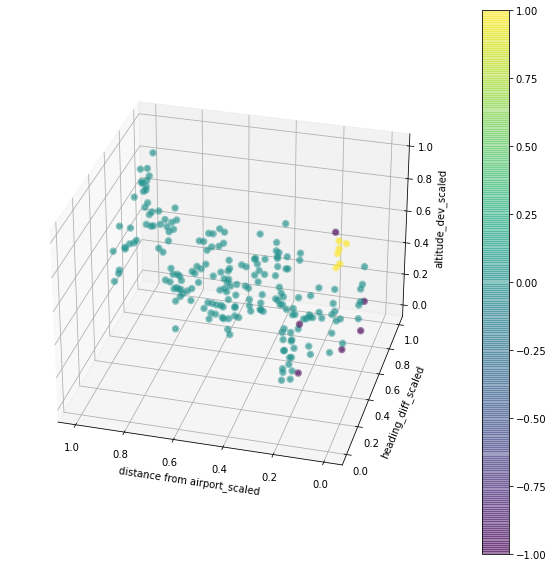

In [23]:
identified_clusters_dbs_2 = clusters_dbs_2.astype(float)
df_clusters_dbs_2 = df_transform.copy()
df_clusters_dbs_2['clusters'] = identified_clusters_dbs_2

fig = plt.figure()
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
p_scatter = ax.scatter3D(df_clusters_dbs_2['dist_from_airport_nm'], df_clusters_dbs_2['heading_diff'], 
            df_clusters_dbs_2['alt_dev'], 
            c=df_clusters_dbs_2['clusters'], 
            cmap='viridis', linewidth=3, alpha=0.5)
fig.colorbar(p_scatter)
ax.set_xlabel('distance from airport_scaled')
ax.set_ylabel('heading_diff_scaled')
ax.set_zlabel('altitude_dev_scaled')
ax.view_init(30,285)
plt.gca().invert_xaxis()
plt.show()

In [24]:
n_noise_2=list(clusters_dbs_2).count(-1)
n_noise_2

6

In [25]:
silhouette_score(df_transform, m_dbs_2.labels_)

0.15968128458483008